### Optimizer, loss function and early stopping

The code known from previous classes is presented below. This time we will make "improvements" to it and consider the correct **optimizer** and **loss function**. We will also introduce the basic `Early Stopping` to our model, which will prevent our model from **overfitting**.


[1. Importing libraries](#1.-Importing-libraries) <br>
[2. Data preparation](#2.-Data-preparation) <br>
[3. Model training](#3.-Model-training) <br>
[Task 1](#Task-1) <br>
[Task 2](#Task-2) <br>
[Task 3](#Task-3) <br>

### 1. Importing libraries


In [ ]:
!pip install mnist

import tensorflow as tf
import numpy as np
import mnist

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from matplotlib import pyplot
from tensorflow.keras.utils import to_categorical

from tensorflow import keras
from tensorflow.keras import backend as K

import pandas as pd
import matplotlib.pyplot as plt

### 2. Data preparation

In [ ]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

model.compile(
  optimizer='adam', 
  loss='categorical_crossentropy', 
  metrics=['accuracy'],
)

In [ ]:
to_categorical(train_labels)

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

### 3. Model training

In [ ]:
f1 = EarlyStopping()
f2 = ModelCheckpoint()

history = model.fit(x, y, validation_data = a, b, callbacks = [f1,f2])
trained model = z

train_accuracy = trained_model.evaluate(x, y)
test_accuracy = trained_model.evaluate(a, b)

print(train_accuracy + test_accuracy)

### Task 1
Do the learning process with early stopping, follow the steps below.
1. Create a `f1` variable, refer to **early stopping**, enter the appropriate values ​​for parameters such as `monitor`, `mode`, `verbose` and `patience`.
2. Create a `f2` variable, refer to **ModelCheckpoint**, enter a name for your model and the appropriate values ​​for `monitor`, `mode`, `verbose` and `save_best_only` parameters.
3. Create a `history` variable. It should contain the training data (x), training data labels (y), test data (a), and test data labels (b) created in the previous step, and corresponding `epochs` and `verbose` parameter values.
4. Create a `trained_model` variable, load the model using the model name from point 2.
5. Create a `train_accuracy` variable , refer to `trained_model.evaluate`, use training data (x) and training data labels (y).
6. Create a `test_accuracy` variable, refer to `trained_model.evaluate`, use test data (a) and test data labels (b).
7. Train the network for 100 `epochs` with a `patience` value = 10. At which epoch will the network training process stop?
8. Display classification `accuracy` on training and test material.

In [ ]:
f1 = EarlyStopping(
    monitor='val_loss', 
    mode='min', 
    verbose=1, #To discover the training epoch on which training was stopped
    patience=15, 
    min_delta=0, #=1 You may want to consider an improvement that is a specific increment, such as 1 unit for mean squared error or 1% for accuracy.
    baseline=None #stop training if performance stays above or below a given threshold or baseline
)

f2 = ModelCheckpoint(
    filepath="model.h5", #save the best model observed during training for later use
    monitor='val_loss',
    mode='min',
    verbose=1, #=1 know the value of the performance measure and at what epoch the model was saved
    save_best_only=True
)

In [ ]:
history = model.fit(
    train_images, 
    to_categorical(train_labels), 
    validation_data = (test_images, to_categorical(test_labels)), 
    callbacks = [f1,f2],
    epochs=100,
    verbose=1
)

Epoch 1/100
1862/1875 [============================>.] - ETA: 0s - loss: 0.3614 - accuracy: 0.8932
Epoch 00001: val_loss improved from inf to 0.23417, saving model to model.h5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3608 - accuracy: 0.8934 - val_loss: 0.2342 - val_accuracy: 0.9282
Epoch 2/100
1868/1875 [============================>.] - ETA: 0s - loss: 0.1844 - accuracy: 0.9440
Epoch 00002: val_loss improved from 0.23417 to 0.15494, saving model to model.h5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1842 - accuracy: 0.9441 - val_loss: 0.1549 - val_accuracy: 0.9497
Epoch 3/100
1847/1875 [============================>.] - ETA: 0s - loss: 0.1398 - accuracy: 0.9567 ETA: 0s - loss: 0.1
Epoch 00003: val_loss improved from 0.15494 to 0.12654, saving model to model.h5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1398 - accuracy: 0.9567 - val_loss: 0.1265 - val_accuracy: 0.9594
Epoch 4/100
1872/1875 [======================

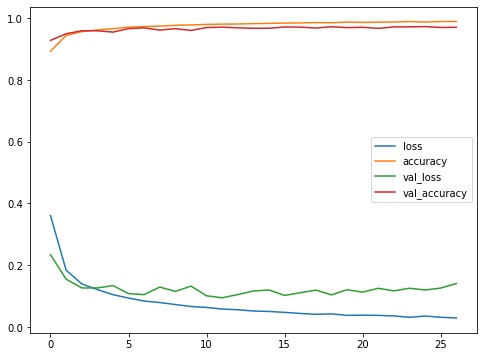

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,6))
plt.show()

In [ ]:
trained_model = load_model('model.h5')

In [ ]:
train_accuracy = trained_model.evaluate(train_images, to_categorical(train_labels))

1875/1875 [==============================] - 1s 711us/step - loss: 0.0459 - accuracy: 0.9847


In [ ]:
test_accuracy = trained_model.evaluate(test_images, to_categorical(test_labels))

313/313 [==============================] - 0s 1ms/step - loss: 0.0947 - accuracy: 0.9712


In [ ]:
f1 = EarlyStopping(
    monitor='val_loss',
    mode='min',
    verbose=1,
    patience=10
)

history = trained_model.fit(
    train_images,
    to_categorical(train_labels),
    epochs=100,
    verbose=1,
    validation_data=(test_images, to_categorical(test_labels)),
    callbacks=[f1, f2]
    )

Epoch 1/100
1869/1875 [============================>.] - ETA: 0s - loss: 0.0555 - accuracy: 0.9818
Epoch 00001: val_loss did not improve from 0.09466
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0558 - accuracy: 0.9818 - val_loss: 0.1036 - val_accuracy: 0.9690
Epoch 2/100
1829/1875 [============================>.] - ETA: 0s - loss: 0.0519 - accuracy: 0.9824
Epoch 00002: val_loss did not improve from 0.09466
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0523 - accuracy: 0.9822 - val_loss: 0.1095 - val_accuracy: 0.9674
Epoch 3/100
1830/1875 [============================>.] - ETA: 0s - loss: 0.0475 - accuracy: 0.9846
Epoch 00003: val_loss did not improve from 0.09466
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0480 - accuracy: 0.9845 - val_loss: 0.1244 - val_accuracy: 0.9682
Epoch 4/100
1864/1875 [============================>.] - ETA: 0s - loss: 0.0489 - accuracy: 0.9841 ETA: 1s - loss: 0.0421 - ac - ETA
Epoch 00004: val_l

**<u>Conclusion</u>**: The network training process stopped in the 16th epoch.

In [ ]:
print(train_accuracy + test_accuracy)

[0.0459163673222065, 0.984749972820282, 0.09465626627206802, 0.9711999893188477]


In [ ]:
train_accuracy_early = model.evaluate(train_images, to_categorical(train_labels))
test_accuracy_early = model.evaluate(train_images, to_categorical(train_labels))
print('\n')
print('Not early stopping:')
print('Train accuracy: %.3f\nTest accuracy: %.3f' % (train_accuracy[1], test_accuracy[1]))
print('\n')
print('Early stopping & patience=10:')
print('Train accuracy: %.3f\nTest accuracy: %.3f' % (train_accuracy_early[1], test_accuracy_early[1]))

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0387 - accuracy: 0.9873


Not early stopping:
Train accuracy: 0.985
Test accuracy: 0.971


Early stopping & patience=10:
Train accuracy: 0.987
Test accuracy: 0.987


### Task 2
Restart the network training process, this time making a change for the `loss` function and the `optimizer`.
1. Try a different `loss` function (**Poisson** distribution). Does such a function make sense in the case of our data set?
2. Try another `optimizer` (using the **Adadelta** algorithm). Do you see any changes in the learning process compared to the algorithm used in the tutorial (**adam**)? Where could the reasons for these differences lie? (see https://keras.io/api/optimizers/adadelta).

Ad. 1.

In [ ]:
model.compile(
    optimizer='adam',
    loss='Poisson',
    metrics=['accuracy'],
)

f1 = EarlyStopping(
    monitor='val_loss',
    mode='min', 
    verbose=1, 
    patience=10, 
)

f2 = ModelCheckpoint(
    filepath="model.h5",
    monitor='val_loss',
    mode='min',
    verbose=1,
    save_best_only=True
)

history = model.fit(
    train_images,
    to_categorical(train_labels),
    epochs=100,
    verbose=1,
    validation_data=(test_images, to_categorical(test_labels)),
    callbacks=[f1, f2]
)

Epoch 1/100
1870/1875 [============================>.] - ETA: 0s - loss: 0.1016 - accuracy: 0.9955
Epoch 00001: val_loss improved from inf to 0.11945, saving model to model.h5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1016 - accuracy: 0.9955 - val_loss: 0.1194 - val_accuracy: 0.9740
Epoch 2/100
1870/1875 [============================>.] - ETA: 0s - loss: 0.1016 - accuracy: 0.9953
Epoch 00002: val_loss did not improve from 0.11945
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1015 - accuracy: 0.9953 - val_loss: 0.1196 - val_accuracy: 0.9744
Epoch 3/100
1860/1875 [============================>.] - ETA: 0s - loss: 0.1013 - accuracy: 0.9962
Epoch 00003: val_loss did not improve from 0.11945
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1013 - accuracy: 0.9962 - val_loss: 0.1220 - val_accuracy: 0.9709
Epoch 4/100
1859/1875 [============================>.] - ETA: 0s - loss: 0.1014 - accuracy: 0.9961 ETA: 0s - loss: 0.1013 - a

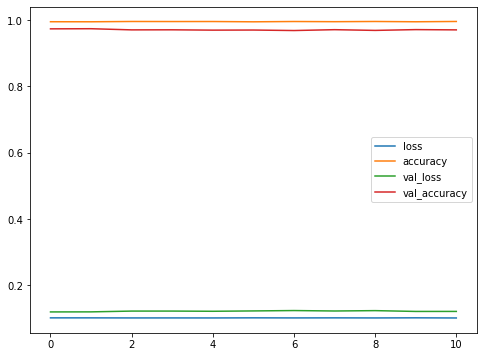

313/313 [==============================] - 0s 993us/step - loss: 0.1194 - accuracy: 0.9740
[0.10030167549848557, 0.9988499879837036, 0.11944528669118881, 0.9739999771118164]


In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,6))
plt.show()

trained_model = load_model('model.h5')
train_accuracy = trained_model.evaluate(train_images, to_categorical(train_labels))
test_accuracy = trained_model.evaluate(test_images, to_categorical(test_labels))
print(train_accuracy + test_accuracy)

In [ ]:
_, train_acc = model.evaluate(train_images, train_labels, verbose=0)
_, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.099, Test: 0.098


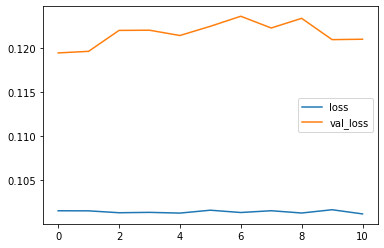

In [ ]:
pyplot.plot(history.history['loss'], label='loss')
pyplot.plot(history.history['val_loss'], label='val_loss')
pyplot.legend()
pyplot.show()

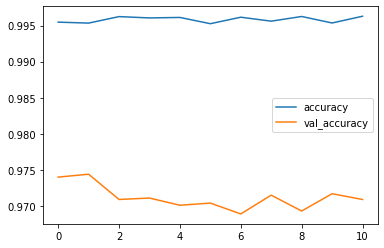

In [ ]:
pyplot.plot(history.history['accuracy'], label='accuracy')
pyplot.plot(history.history['val_accuracy'], label='val_accuracy')
pyplot.legend()
pyplot.show()

**<u> Conclusion </u>**: The loss function in the form of the `Poisson distribution` does not fully work in our case. The `categorical crossentropy` function fared better.

Ad. 2.

In [ ]:
model.compile(
    optimizer='adadelta',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

f1 = EarlyStopping(
    monitor='val_loss',
    mode='min', 
    verbose=1, 
    patience=10, 
)

f2 = ModelCheckpoint(
    filepath="model.h5",
    monitor='val_loss',
    mode='min',
    verbose=1,
    save_best_only=True
)

history = model.fit(
    train_images,
    to_categorical(train_labels),
    epochs=100,
    verbose=1,
    validation_data=(test_images, to_categorical(test_labels)),
    callbacks=[f1, f2]
)

Epoch 1/100
1832/1875 [============================>.] - ETA: 0s - loss: 0.0076 - accuracy: 0.9974
Epoch 00001: val_loss improved from inf to 0.25209, saving model to model.h5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0076 - accuracy: 0.9975 - val_loss: 0.2521 - val_accuracy: 0.9711
Epoch 2/100
1825/1875 [============================>.] - ETA: 0s - loss: 0.0072 - accuracy: 0.9976
Epoch 00002: val_loss improved from 0.25209 to 0.25124, saving model to model.h5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0072 - accuracy: 0.9976 - val_loss: 0.2512 - val_accuracy: 0.9714
Epoch 3/100
1856/1875 [============================>.] - ETA: 0s - loss: 0.0069 - accuracy: 0.9977
Epoch 00003: val_loss improved from 0.25124 to 0.25048, saving model to model.h5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0069 - accuracy: 0.9977 - val_loss: 0.2505 - val_accuracy: 0.9716
Epoch 4/100
1835/1875 [============================>.] - ETA: 0s 

1867/1875 [============================>.] - ETA: 0s - loss: 0.0018 - accuracy: 0.9995
Epoch 00053: val_loss improved from 0.23733 to 0.23724, saving model to model.h5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.2372 - val_accuracy: 0.9730
Epoch 54/100
1847/1875 [============================>.] - ETA: 0s - loss: 0.0017 - accuracy: 0.9995
Epoch 00054: val_loss improved from 0.23724 to 0.23714, saving model to model.h5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.2371 - val_accuracy: 0.9729
Epoch 55/100
1857/1875 [============================>.] - ETA: 0s - loss: 0.0017 - accuracy: 0.9995
Epoch 00055: val_loss improved from 0.23714 to 0.23705, saving model to model.h5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.2371 - val_accuracy: 0.9730
Epoch 56/100
1861/1875 [============================>.] - ETA: 0s - los

1826/1875 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 0.9995
Epoch 00079: val_loss improved from 0.23537 to 0.23531, saving model to model.h5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0012 - accuracy: 0.9995 - val_loss: 0.2353 - val_accuracy: 0.9732
Epoch 80/100
1864/1875 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 0.9995
Epoch 00080: val_loss improved from 0.23531 to 0.23525, saving model to model.h5
1875/1875 [==============================] - 2s 970us/step - loss: 0.0012 - accuracy: 0.9995 - val_loss: 0.2353 - val_accuracy: 0.9732
Epoch 81/100
1832/1875 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 0.9995
Epoch 00081: val_loss improved from 0.23525 to 0.23518, saving model to model.h5
1875/1875 [==============================] - 2s 903us/step - loss: 0.0012 - accuracy: 0.9995 - val_loss: 0.2352 - val_accuracy: 0.9732
Epoch 82/100
1827/1875 [============================>.] - ETA: 0s -

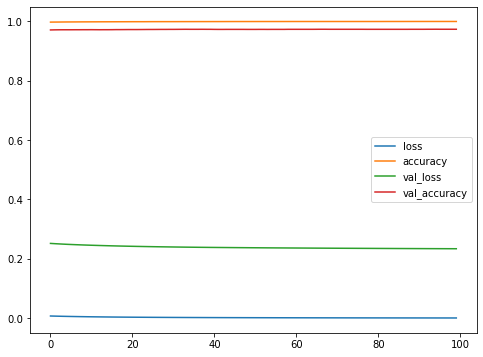

313/313 [==============================] - 0s 1ms/step - loss: 0.2342 - accuracy: 0.9734
[0.0009366142912767828, 0.9996500015258789, 0.2341572791337967, 0.9733999967575073]


In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,6))
plt.show()

trained_model = load_model('model.h5')
train_accuracy = trained_model.evaluate(train_images, to_categorical(train_labels))
test_accuracy = trained_model.evaluate(test_images, to_categorical(test_labels))
print(train_accuracy + test_accuracy)

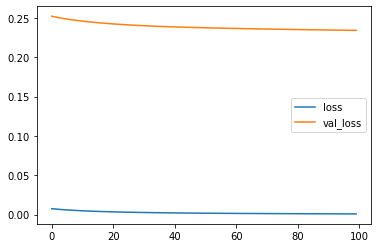

In [ ]:
pyplot.plot(history.history['loss'], label='loss')
pyplot.plot(history.history['val_loss'], label='val_loss')
pyplot.legend()
pyplot.show()

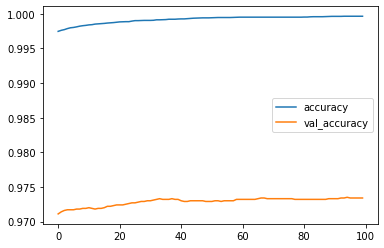

In [ ]:
pyplot.plot(history.history['accuracy'], label='accuracy')
pyplot.plot(history.history['val_accuracy'], label='val_accuracy')
pyplot.legend()
pyplot.show()

### Task 3
Sometimes it is useful to be able to modify the `loss` function or build our own loss function from scratch. In Keras / Tensorflow it is quite a simple thing that we can do with basic operations.

The following example illustrates how we can use the Root Mean Square Error (**RMSE**) loss function for two variables (`y_true` and `y_pred`).

In [ ]:
y_true = 43.2
y_pred = 4.2

x = tf.keras.metrics.RootMeanSquaredError()
x(y_true, y_pred).numpy()

39.0

Recreate the Root Mean Squared Error function by creating a new function from scratch.

In [ ]:
import math

def custom_loss_function(y_true, y_pred):
    MSE = np.square(y_true-y_pred).mean()
    RMSE = np.sqrt(MSE)
    return RMSE

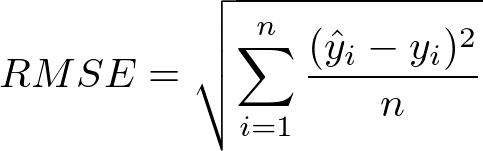

In [ ]:
loss = custom_loss_function(y_true, y_pred)
print('RMSE: {}'.format(loss))

RMSE: 39.0
